#EDA on Cyber Attacks

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

We will use an original data from my previous company. This has no confidential information and can be used for our purpose.

In [ ]:
# Loading the data

df = pd.read_csv("Cybersecurity_attacks.csv")
df.shape

(178031, 11)

As we can see, this is a huge dataset with more than 178k rows.
Let's check what all this dataset contains.

In [ ]:
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418


As we can see there are 11 columns. We will now perform some data cleaning.
Let's seperate the start and end time and create a new column for that.

In [ ]:
df[['Start Time','End Time']] = df['Time'].str.split('-', expand = True) # New column for start and end time
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,.,Time,Start Time,End Time
0,Reconnaissance,HTTP,tcp,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,.,1421927414-1421927416,1421927414,1421927416
1,Exploits,Unix 'r' Service,udp,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,.,1421927415-1421927415,1421927415,1421927415
2,Exploits,Browser,tcp,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,.,1421927416-1421927416,1421927416,1421927416
3,Exploits,Miscellaneous Batch,tcp,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,.,1421927417-1421927417,1421927417,1421927417
4,Exploits,Cisco IOS,tcp,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,.,1421927418-1421927418,1421927418,1421927418


There is a column named ".". Let's check if this is relevant, if not, we will drop it from our dataset.

In [ ]:
#Checking if column '.' has some useful values
df['.'].unique()

array(['.'], dtype=object)

In [ ]:
# Dropping the '.' and 'Time' column as they are now irrelevant
df = df.drop(['.','Time'], axis = 1)

We will now check what all are the missing values in the dataset and thier relevance.

<Axes: >

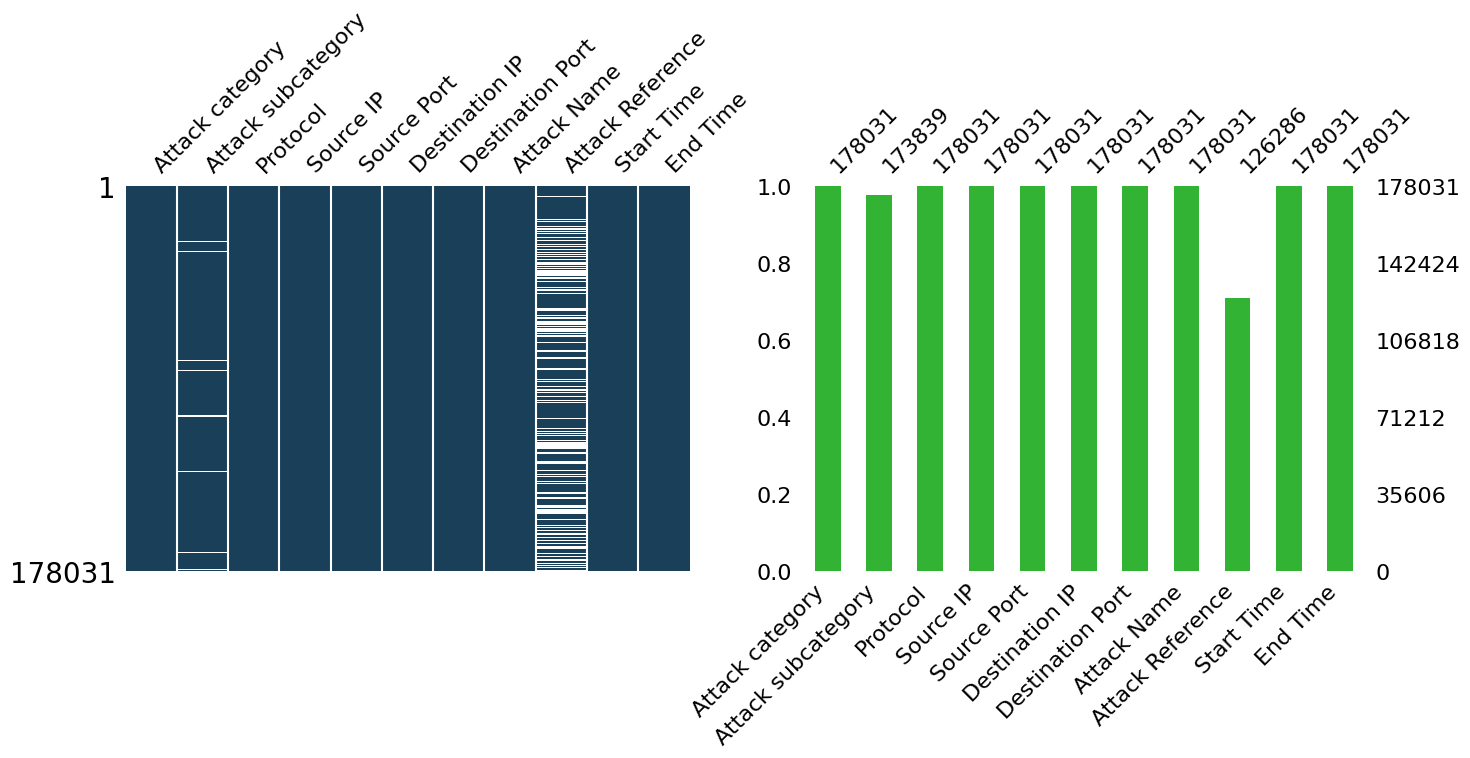

In [ ]:
# Checking for the missing values using plots
import matplotlib.pyplot as plt
import missingno as msno

figure, (ax1, ax2) = plt.subplots(1,2, figsize = (16,5))
msno.matrix(df, ax=ax1, sparkline=False, color=(0.1, 0.25, 0.35))
msno.bar(df, ax=ax2, color=(0.2, 0.7, 0.2))

From the above plot, it's clear that there are some values missing in Attack subcategory and Attack reference column.
Let's check their count.

In [ ]:
df.isnull().sum()

Attack category           0
Attack subcategory     4192
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start Time                0
End Time                  0
dtype: int64

Let's identify these missing values in Attack subcategory as Not registered.

In [ ]:
df['Attack subcategory'] = df['Attack subcategory'].fillna('Not registered')

In [ ]:
# Checking if the task is achieved.
df.isnull().sum()

Attack category           0
Attack subcategory        0
Protocol                  0
Source IP                 0
Source Port               0
Destination IP            0
Destination Port          0
Attack Name               0
Attack Reference      51745
Start Time                0
End Time                  0
dtype: int64

Let's check for any duplicacy in our dataset.

In [ ]:
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time
32881,Exploits,Browser,ospf,175.45.176.1,0,149.171.126.16,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424223999,1424224029
40645,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.13,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424227562,1424227593
61710,Exploits,Browser,ospf,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424231161,1424231205
115911,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424246344,1424246344
122923,Exploits,Browser,sep,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
148693,Exploits,Browser,sctp,175.45.176.3,0,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424256448,1424256450


In [ ]:
# Dropping the duplicate data.
df = df.drop(df[df.duplicated()].index)

In [ ]:
# Validating whether the duplicates are removed
df[df.duplicated()]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time


As we all the know, the value of ports can be in the range (1, 65535). Anything outside this range is wrong value. Let's check if there are any such values and remove those rows from the dataset.

In [ ]:
invalid_SP = (df['Source Port'] < 0) | (df['Source Port'] > 65535)
invalid_DP = (df['Destination Port'] < 0) | (df['Destination Port'] > 65535)
df[invalid_SP | invalid_DP]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time
174347,Generic,IXIA,udp,175.45.176.1,67520,149.171.126.18,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2005-4092 (http://cve.mitre.org/cgi-bin/cv...,1421933561,1421933561
174348,Exploits,Browser,tcp,175.45.176.3,78573,149.171.126.18,110,Microsoft Internet Explorer 6.0 Png pngfilt.dl...,BPS 2010-0002 (https://strikecenter.bpointsys....,1421932490,1421932491
174349,Reconnaissance,HTTP,tcp,175.45.176.1,71804,149.171.126.10,80,Domino Web Server Database Access: /internet.n...,NaN,1424236143,1424236143
174350,DoS,Ethernet,pnni,175.45.176.3,0,149.171.126.19,-753,Cisco IPS Jumbo Frame System Crash (https://st...,CVE 2008-2060 (http://cve.mitre.org/cgi-bin/cv...,1424230284,1424230284
174351,Fuzzers,OSPF,trunk-1,175.45.176.0,73338,149.171.126.13,0,Fuzzer: OSPF Hello Packet: Long Neighbor Lists...,NaN,1424223172,1424223172
...,...,...,...,...,...,...,...,...,...,...,...
178026,Generic,IXIA,udp,175.45.176.0,72349,149.171.126.12,53,Microsoft_DNS_Server_ANY_Query_Cache_Weakness_...,CVE 2009-0234 (http://cve.mitre.org/cgi-bin/cv...,1424224338,1424224338
178027,Exploits,Browser,sep,175.45.176.3,67647,149.171.126.18,0,Persits XUpload ActiveX Method MakeHttpRequest...,CVE 2009-3693 (http://cve.mitre.org/cgi-bin/cv...,1424249567,1424249567
178028,Exploits,Office Document,tcp,175.45.176.0,78359,149.171.126.13,110,Microsoft Excel SxView Memory Corruption (POP3...,CVE 2009-3128 (http://cve.mitre.org/cgi-bin/cv...,1424219921,1424219923
178029,Exploits,Browser,tcp,175.45.176.2,68488,149.171.126.19,80,Internet Explorer createTextRange() Code Execu...,CVE 2006-1359 (http://cve.mitre.org/cgi-bin/cv...,1424247789,1424247789


In [ ]:
df = df[~(invalid_SP | invalid_DP)].reset_index(drop=True)
df.shape

(174341, 11)

We have removed the noise data now. Let's identify if there is any need of modification in other columns.

In [ ]:
df['Protocol'].unique()

array(['tcp', 'udp', 'Tcp', 'UDP', 'ospf', 'sctp', 'sep', 'mobile',
       'sun-nd', 'swipe', 'pim', 'ggp', 'ip', 'ipnip', 'st2', 'cbt',
       'egp', 'argus', 'bbn-rcc', 'chaos', 'emcon', 'igp', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'xns-idp',
       'trunk-2', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'iso-tp4', 'netblt',
       'merit-inp', 'mfe-nsp', '3pc', 'idpr', 'xtp', 'ddp', 'idpr-cmtp',
       'tp++', 'il', 'ipv6', 'idrp', 'ipv6-frag', 'ipv6-route', 'sdrp',
       'gre', 'mhrp', 'rsvp', 'bna', 'i-nlsp', 'rvd', 'narp', 'ipv6-no',
       'skip', 'tlsp', 'ipv6-opts', 'any', 'cftp', 'kryptolan',
       'sat-expak', 'ippc', 'sat-mon', 'cpnx', 'ipcv', 'visa', 'cphb',
       'wsn', 'br-sat-mon', 'pvp', 'wb-expak', 'wb-mon', 'iso-ip',
       'secure-vmtp', 'vmtp', 'ttp', 'vines', 'nsfnet-igp', 'dgp',
       'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp', 'ax.25', 'ipip',
       'micp', 'aes-sp3-d', 'encap', 'etherip', 'gmtp', 'pri-enc', 'ifmp',
       'pnni', 'aris

Here, the data looks like it is not standardised. We need to maintain the same alphabetical case so that these values are not coming different.

In [ ]:
df['Attack category'].unique()

array(['Reconnaissance', 'Exploits', 'DoS', 'Generic', 'Shellcode',
       ' Fuzzers', 'Worms', 'Backdoors', 'Analysis', ' Fuzzers ',
       ' Reconnaissance ', 'Backdoor', ' Shellcode ', 'Reconnaissance '],
      dtype=object)

Here, some extra spaces are there in some values. Backdoor and Backdoors are coming twice.

Let's check the current unique values:

In [ ]:
print('No. of unique Protocol =', len(df['Protocol'].unique()))
print('No. of unique Attack category =', len(df['Attack category'].unique()))

No. of unique Protocol = 131
No. of unique Attack category = 14


Let's do the modification using NLP techniques.

In [ ]:
# All values are being converted to uppercase, and space being removed, if any.
df['Protocol'] = df['Protocol'].str.upper().str.strip()
df['Attack category'] = df['Attack category'].str.upper().str.strip().replace('BACKDOORS','BACKDOOR') # Replacing the Backdoors with Backdoor.

Let's check the shape again.

In [ ]:
print('No. of unique Protocol =', len(df['Protocol'].unique()))
print('No. of unique Attack category =', len(df['Attack category'].unique()))

No. of unique Protocol = 129
No. of unique Attack category = 9


As observed, the no. of distinct values is reduced, indicating that the columns are standardized.

Let's if there are any missing values in Start Time and End Time, and remove the rows, if any.

In [ ]:
df[df['Start Time'].isnull() == True]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time


In [ ]:
df[df['End Time'].isnull() == True]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time


As observed, there are no missing values found.

Let's change the date-time into readable format so that we can use them easily for our analysis.

In [ ]:
df['Start Time'] = pd.to_datetime(df['Start Time'], unit='s')
df['End Time'] = pd.to_datetime(df['End Time'], unit='s')
df.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18


At this stage, our dataset is cleaned and ready for our purpose.

We can now start with the EDA part.

We have one more dataset that contains the Port and Service data. Let's load that dataset.

In [ ]:
tcp_ports = pd.read_csv('TCP-ports.csv')
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,tcpmux,TCP Port Service Multiplexer
2,2,compressnet,Management Utility
3,3,compressnet,Compression Process
4,5,rje,Remote Job Entry


Let's standardize the Service column

In [ ]:
tcp_ports['Service'] = tcp_ports['Service'].str.upper()
tcp_ports.head()

,Port,Service,Description
0,0,NaN,Reserved
1,1,TCPMUX,TCP Port Service Multiplexer
2,2,COMPRESSNET,Management Utility
3,3,COMPRESSNET,Compression Process
4,5,RJE,Remote Job Entry


Let's now add this column Service to our original dataset and name the new data set as newdf.

In [ ]:
newdf = pd.merge(df, tcp_ports[['Port', 'Service']], left_on = 'Destination Port', right_on = 'Port', how = 'left')
newdf = newdf.rename(columns = {'Service':'Destination Port Service'})
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Port,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,80.0,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,80.0,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,5555.0,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,80.0,HTTP


In [ ]:
newdf = newdf.drop(['Port'],axis=1)
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Destination Port Service
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP


Let's identify the counts of the type of attacks.

In [ ]:
newdf['Attack category'].value_counts()

EXPLOITS          68211
FUZZERS           33638
DOS               24582
RECONNAISSANCE    20136
GENERIC           19860
BACKDOOR           4353
ANALYSIS           1881
SHELLCODE          1511
WORMS               169
Name: Attack category, dtype: int64

In [ ]:
newdf['Attack category'].value_counts()*100/newdf['Attack category'].value_counts().sum() # % of the Attack category

EXPLOITS          39.125048
FUZZERS           19.294371
DOS               14.099954
RECONNAISSANCE    11.549779
GENERIC           11.391468
BACKDOOR           2.496831
ANALYSIS           1.078920
SHELLCODE          0.866692
WORMS              0.096936
Name: Attack category, dtype: float64

Exploits has the highest percentage. Lets visualise this on a barplot to get a clear picture.

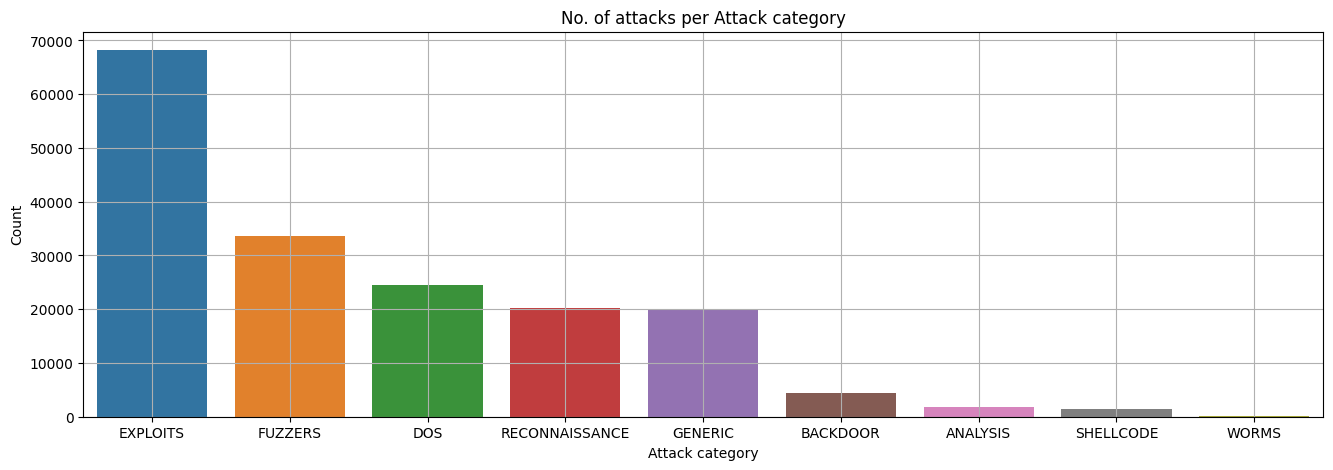

In [ ]:
import seaborn as sns

plt.figure(figsize=(16,5))
sns.barplot(x=newdf['Attack category'].value_counts().index, y=newdf['Attack category'].value_counts())
plt.xlabel('Attack category')
plt.ylabel('Count')
plt.title('No. of attacks per Attack category')
plt.grid()

Now that we have the type of attack and their count, let's add a new column that stores the duration of the attack.

In [ ]:
newdf['Duration'] = ((newdf['End Time'] - newdf['Start Time']).dt.seconds).astype(int) # Duration in seconds
newdf.head()

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Destination Port Service,Duration
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0


Let's identify the dates on which the attacks started.

In [ ]:
newdf['Start Time'].astype(str).str.split(' ').str[0].unique()

array(['2015-01-22', '2015-02-18'], dtype=object)

As per the data, the attacks occured only on 2 mentioned dates.

Lets try to get  if there is any pattern in the attack.

In [ ]:
newdf.describe()

,Source Port,Destination Port,Duration
count,174341.000000,174341.000000,174341.000000
mean,15391.130382,1304.599423,2.341572
std,21707.824000,7466.035607,9.309381
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,31862.000000,80.000000,1.000000
max,65535.000000,65535.000000,60.000000


Here, we can notice that source port has a mean of 15391 and destination has a mean of 1304, which shows that attackers are trying to attack the IPs on lower ports.

If we compare the 75 percentile, we can observe the same thing the port 80 is attacked more where as the source port could be anything in the port range. However, the min and max is same.

Lets test this hypothesis whether the mean has any significance to our assumption.

> H0 : mu1 = mu2

> H1 : m1 != mu2

We will assume alpha as 0.05 for our test.

In [ ]:
import scipy.stats as stats

_, pvalue = stats.ttest_ind(newdf['Source Port'], newdf['Destination Port'], equal_var=True)

In [ ]:
if(pvalue < 0.05):
  print("Reject the null hypothesis")
else:
  print("Fail to reject the null hypothesis")

Reject the null hypothesis


Here, we will reject the null hypothesis. This means that the attack is not random. Attackers are attacking the specific logical ports.

Lets try to get the correlation using both Pearson and Spearman coefficient.

In [ ]:
newdf.corr(method='pearson')

,Source Port,Destination Port,Duration
Source Port,1.000000,0.137155,-0.078024
Destination Port,0.137155,1.000000,-0.026770
Duration,-0.078024,-0.026770,1.000000


Looks like there is no linear relationship between the Source and Destination Port. Let's validate it with Spearman's correlation coefficient.

In [ ]:
newdf.corr(method='spearman')

,Source Port,Destination Port,Duration
Source Port,1.000000,0.885328,0.361013
Destination Port,0.885328,1.000000,0.346909
Duration,0.361013,0.346909,1.000000


This table shows that there is a monotonic relationship between the Source and Destination Port.

Let's plot a heatmap each for Pearson and Spearman coefficients.

In [ ]:
df_dummies = pd.get_dummies(newdf, columns=['Attack category']) # Converting the Attack category to numerical data.
# This is done to create the heat matrix.

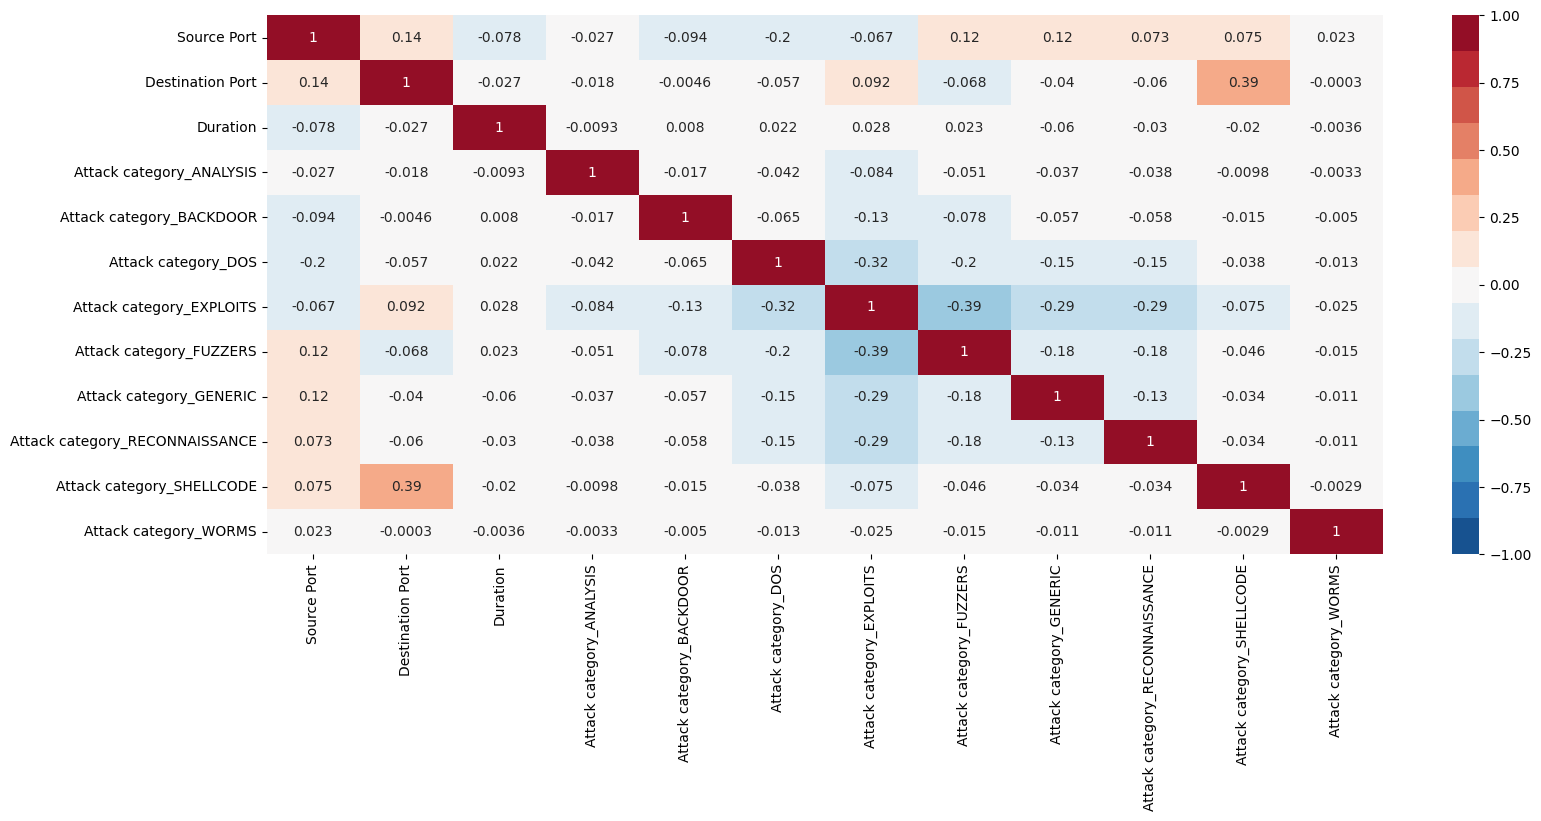

In [ ]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='pearson'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette('RdBu_r',15))
plt.show()

We can observe that the Pearson correlation is very less among attributes. Lets validate the same using Spearman correlation.

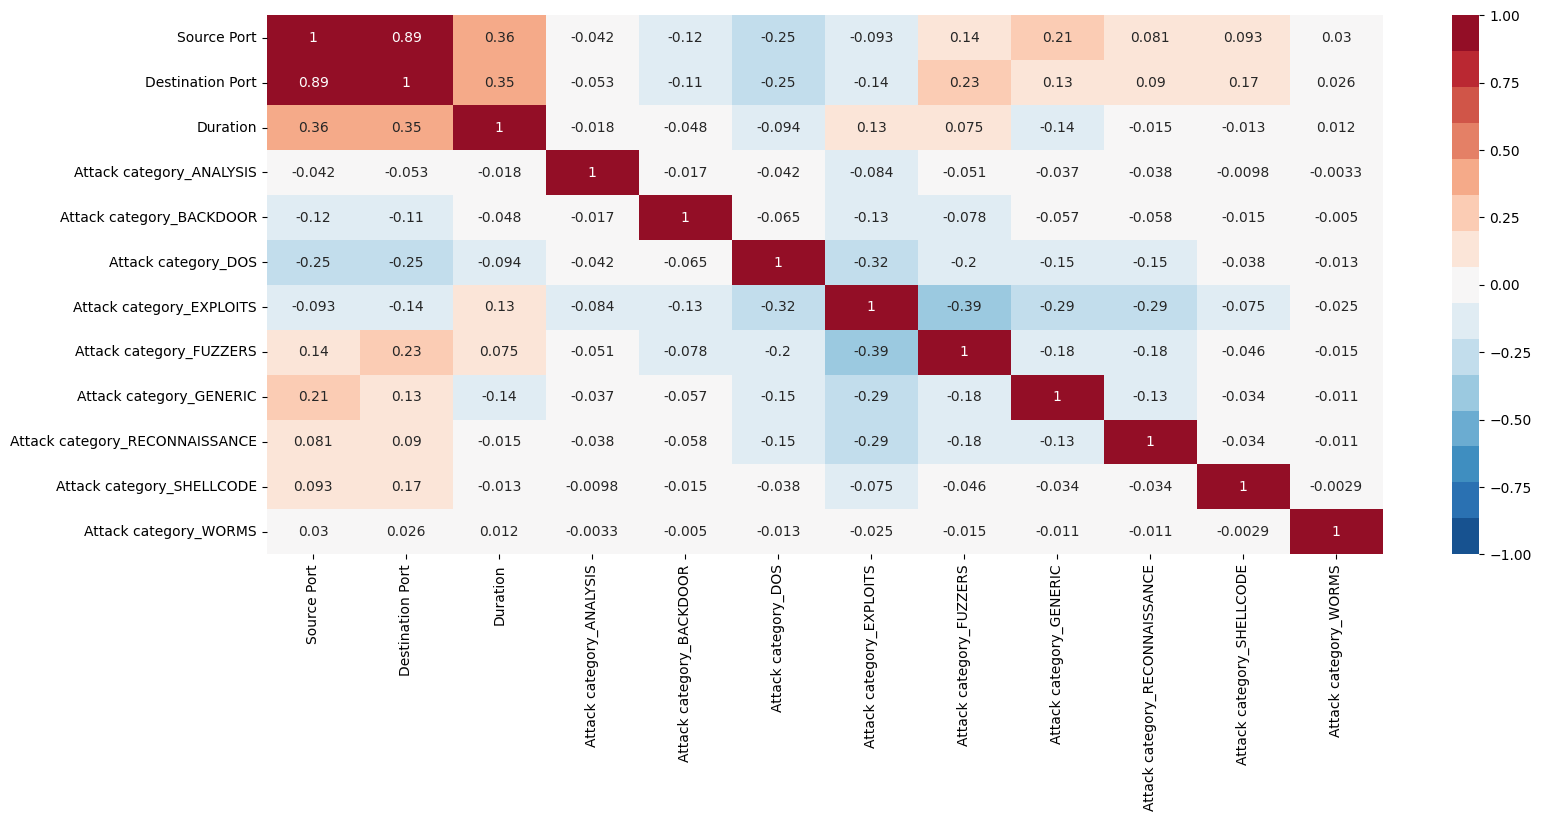

In [ ]:
plt.figure(figsize=(18,7))
sns.heatmap(df_dummies.corr(method='spearman'), annot=True, vmin=-1.0, vmax=1.0, cmap=sns.color_palette('RdBu_r',15))
plt.show()

The graph satisfies the monotonic relationship between Source and Destination Port.

Comparing the both the above graphs, we can confirm that some attacks are monotonic, and some are linear to source and destination ports.

Let's plot a pairplot and try to get some inference.

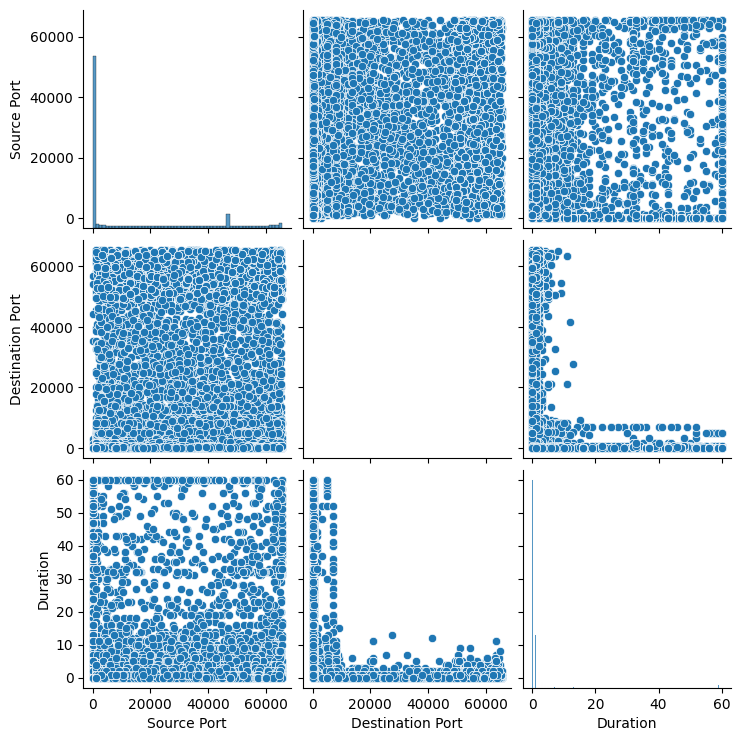

In [ ]:
g = sns.pairplot(newdf)
plt.show()

Destination and Source port looks like randomly distributed. We can't grasp any inference out of it.

But, if we observe the Destination Port vs Duration plot, we can notice that lower ports are attacked for longer duration.

Let's identify the IPs that are attcked and their counts.

In [ ]:
newdf['Destination IP'].value_counts()

149.171.126.17    43199
149.171.126.10    24002
149.171.126.19    21619
149.171.126.13    20464
149.171.126.18    13301
149.171.126.14    12195
149.171.126.12    11970
149.171.126.15    10555
149.171.126.11     9444
149.171.126.16     7592
Name: Destination IP, dtype: int64

IP 149.171.126.17 is attacked the most. Let's observe the pattern for the attack.

We can plot a scatterplot to identify the pattern in the attack to this IP.

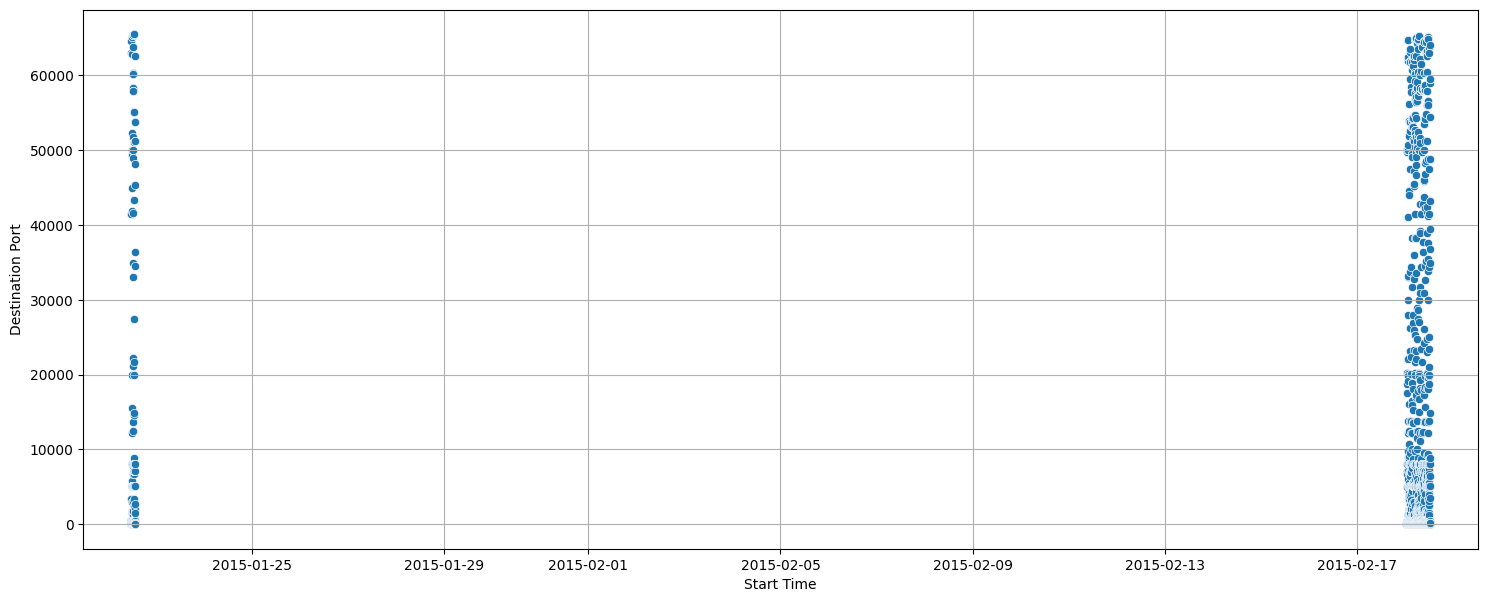

In [ ]:
from datetime import datetime, timedelta
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start Time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start Time'].min()-timedelta(days=1), right=newdf['Start Time'].max()+timedelta(days=1))
plt.grid()
plt.show()

We can hardly take any inference out of it, except that the attacks are more in right region that the left region.

Let's plot the left and right region seperately.

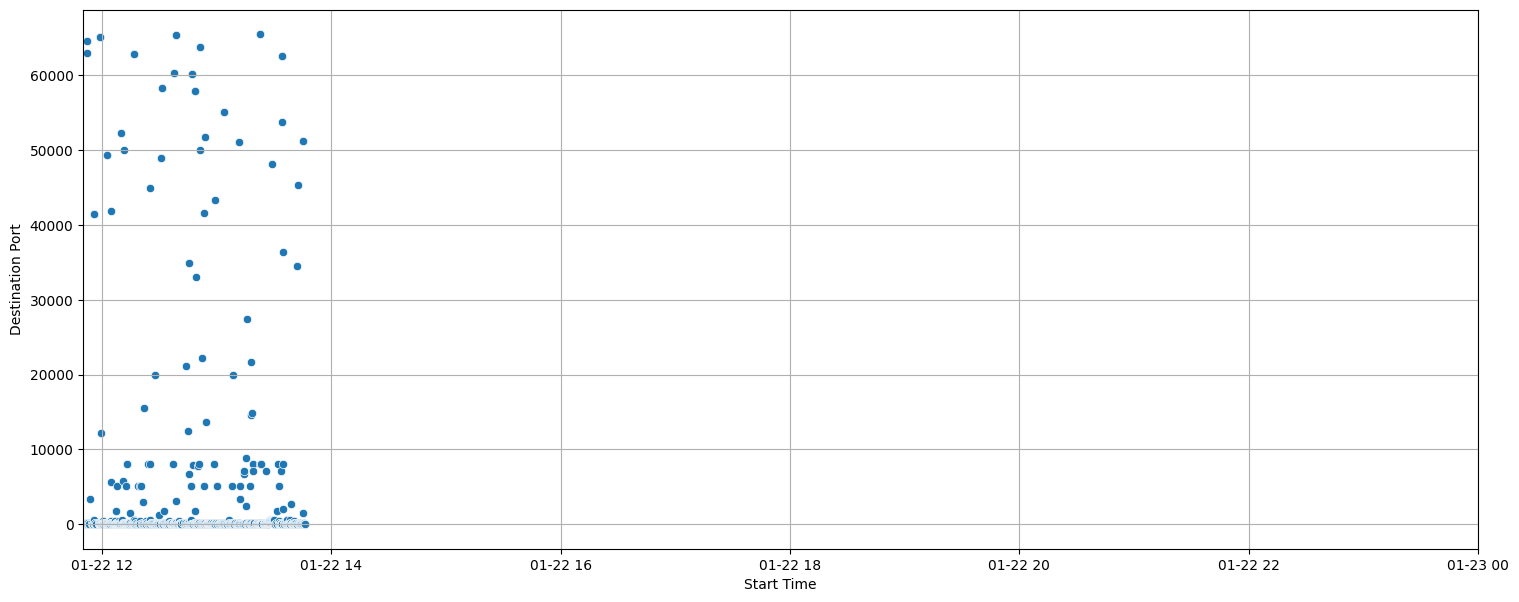

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start Time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=newdf['Start Time'].min(), right=datetime.strptime('15-01-23', '%y-%m-%d')) # Filtering the region based on min datetime.
plt.grid(True)
plt.show()

We can observe here that the attacks are more on the lower ports.

Lets check for the right region as well.

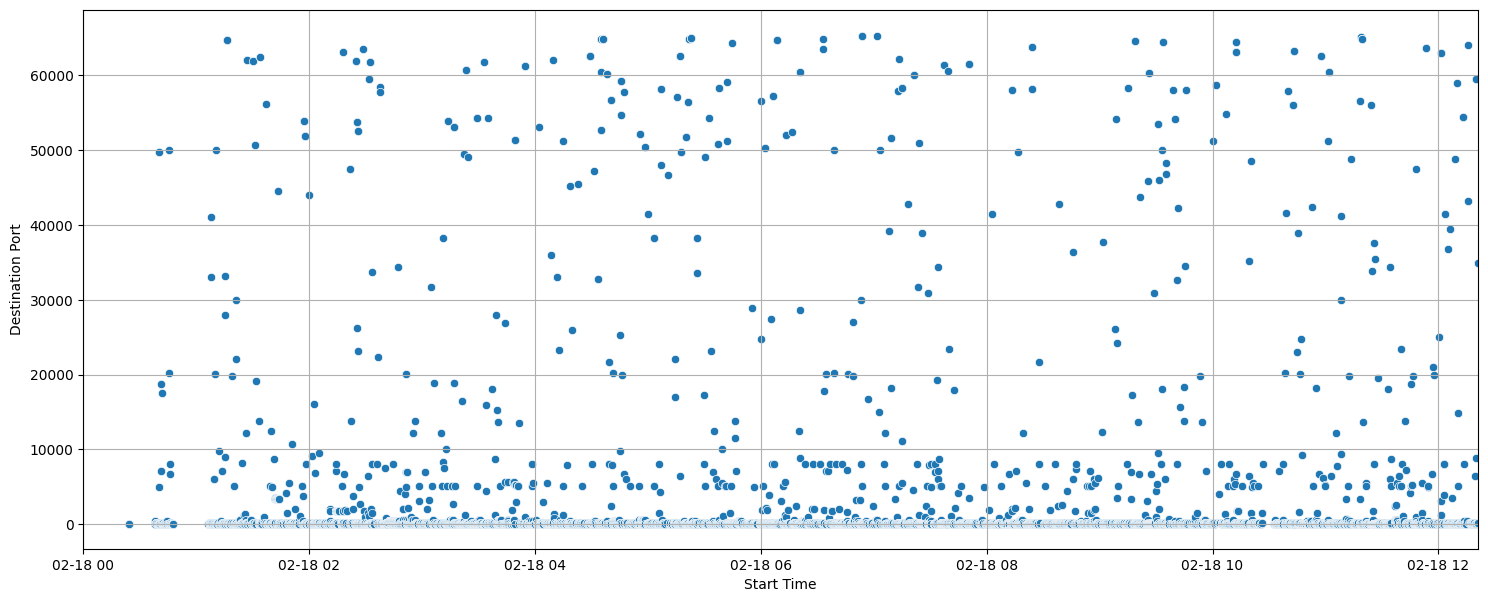

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x=newdf[newdf['Destination IP']=='149.171.126.17']['Start Time'], y=newdf[newdf['Destination IP']=='149.171.126.17']['Destination Port'])
plt.xlim(left=datetime.strptime('15-02-18', '%y-%m-%d'), right=newdf['Start Time'].max())
plt.grid(True)
plt.show()

In both the regions, the attacks are very high on the lower ports.

Let's zoom in to identify the pattern closely.

Here, we will use hue to identify the dominancy of the type of attacks based on ports.

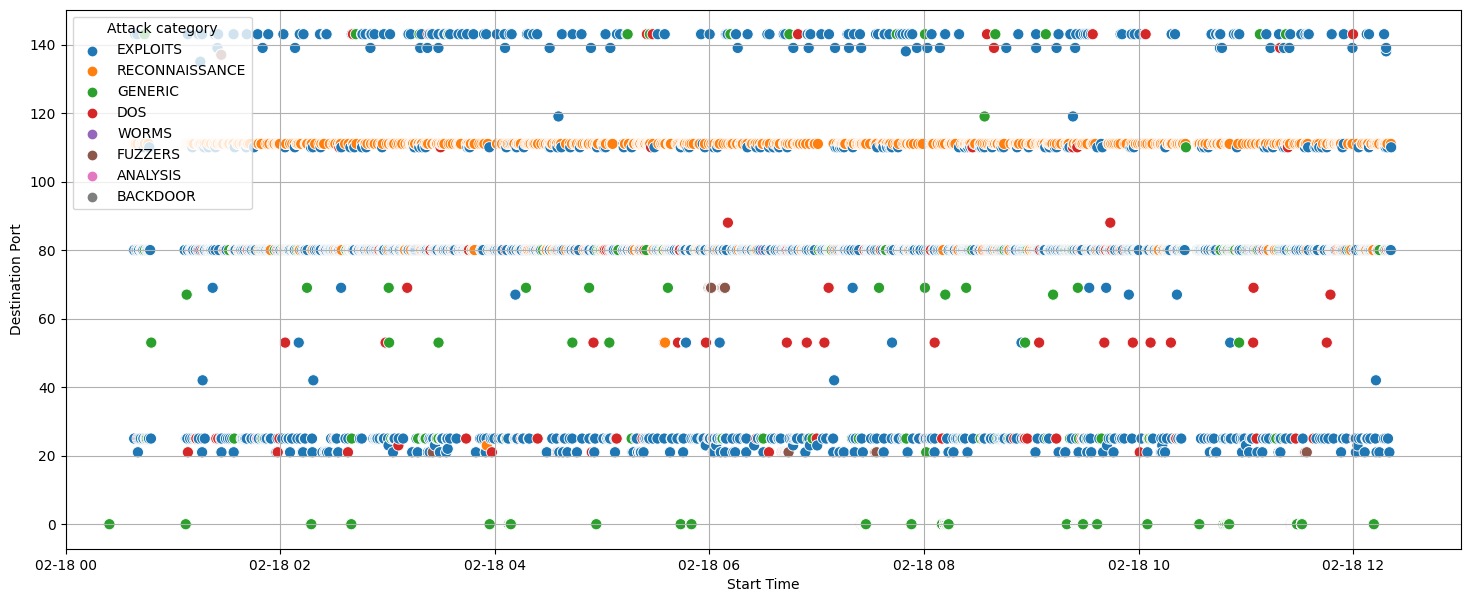

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Start Time', y='Destination Port', hue='Attack category',
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)],
                s=65)
plt.xlim(left=datetime.strptime('15-02-18 00:00:00', '%y-%m-%d %H:%M:%S'),
         right=datetime.strptime('15-02-18 13:00:00', '%y-%m-%d %H:%M:%S'))
plt.grid(True)
plt.show()

We can easily notice the port 25, 80, 110, are attacked the most.

Port 25 is mainly expoloits, Port 80 has all types of attacks, and Port 100 is mainly reconnaissance.

Let's now find the relationship between ports and duration.

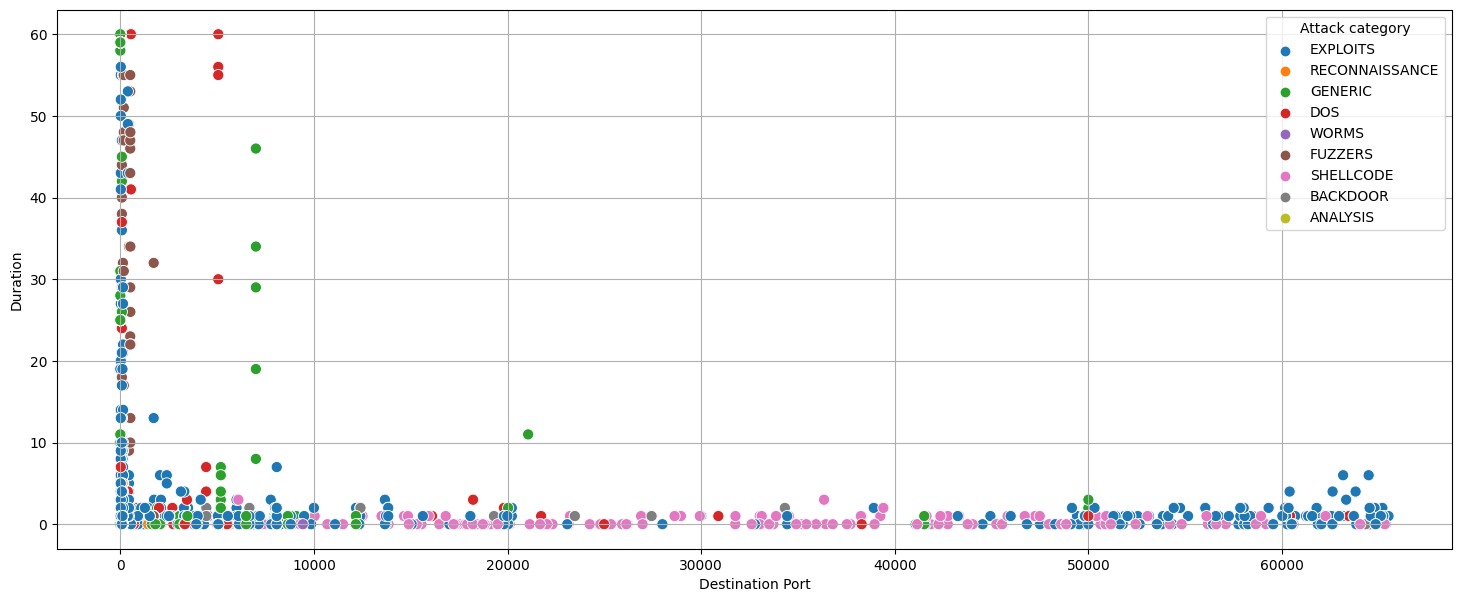

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category',
                data=newdf[(newdf['Destination IP']=='149.171.126.17')],
                s=65)
plt.grid(True)
plt.show()

Lower ports are attacked for a longer duration. Let's zoom in to the lower region.

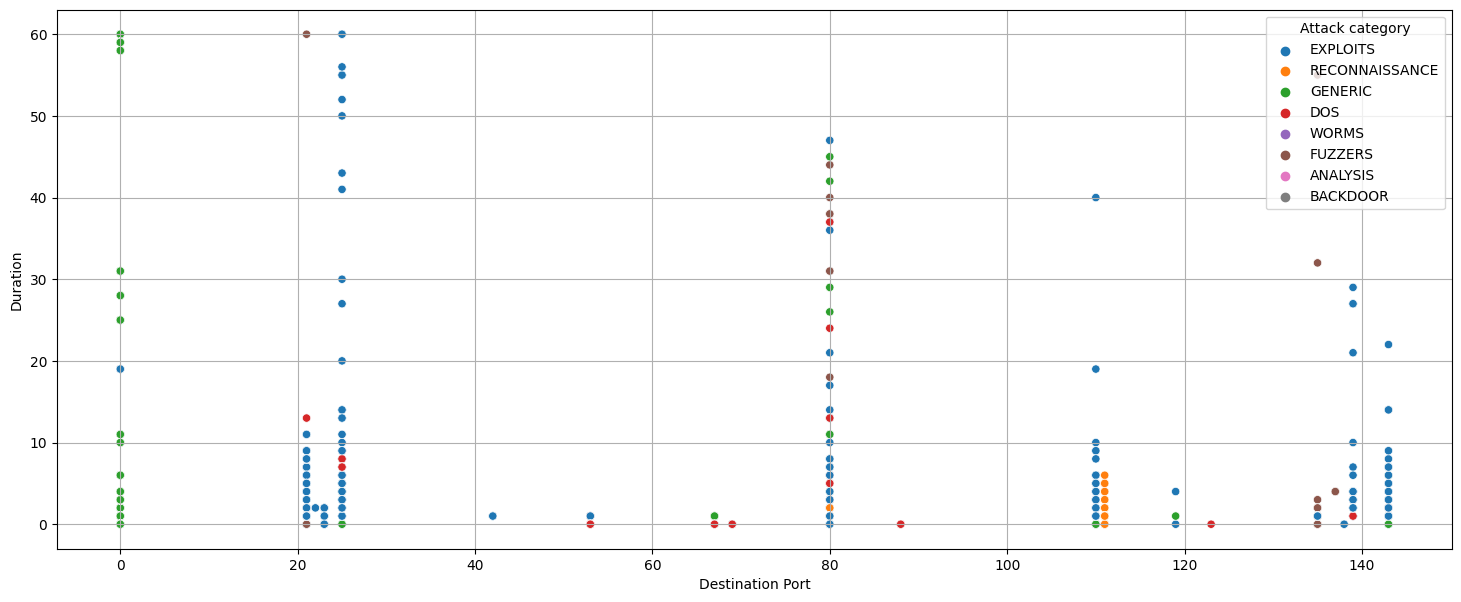

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Destination Port', y='Duration', hue='Attack category',
                data=newdf[(newdf['Destination IP']=='149.171.126.17')&(newdf['Destination Port']<=150)])
plt.grid(True)
plt.show()

This plot suggests the duration of attacks by ports.

Let's define a function to create heatmap. We will use this to plot the heatmap to analyse the relation between duration and the type of attacks.

In [ ]:
def heatmap_graph(df, xlabel, ylabel, title):
    plt.figure(figsize=(18,8))
    ax = sns.heatmap(df)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.yticks(rotation=0)
    plt.show()

We will now be moving ahead to analyse the relation between attack and the hours at which its happeing.

For this we will create a new row that stores the hour at which the attack occured. Then we will create a pivot table for attack vs hours

In [ ]:
newdf["Start Time"][1].hour

11

In [ ]:
df_pivot = newdf.copy()
df_pivot['Hour'] = df_pivot.apply(lambda row: '0'*(2-len(str(row['Start Time'].hour)))+str(row['Start Time'].hour)+':00:00', axis=1)

In [ ]:
df_pivot[:5]

,Attack category,Attack subcategory,Protocol,Source IP,Source Port,Destination IP,Destination Port,Attack Name,Attack Reference,Start Time,End Time,Destination Port Service,Duration,Hour
0,RECONNAISSANCE,HTTP,TCP,175.45.176.0,13284,149.171.126.16,80,Domino Web Server Database Access: /doladmin.n...,-,2015-01-22 11:50:14,2015-01-22 11:50:16,HTTP,2,11:00:00
1,EXPLOITS,Unix 'r' Service,UDP,175.45.176.3,21223,149.171.126.18,32780,Solaris rwalld Format String Vulnerability (ht...,CVE 2002-0573 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:15,2015-01-22 11:50:15,NaN,0,11:00:00
2,EXPLOITS,Browser,TCP,175.45.176.2,23357,149.171.126.16,80,Windows Metafile (WMF) SetAbortProc() Code Exe...,CVE 2005-4560 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:16,2015-01-22 11:50:16,HTTP,0,11:00:00
3,EXPLOITS,Miscellaneous Batch,TCP,175.45.176.2,13792,149.171.126.16,5555,HP Data Protector Backup (https://strikecenter...,CVE 2011-1729 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:17,2015-01-22 11:50:17,PERSONAL-AGENT,0,11:00:00
4,EXPLOITS,Cisco IOS,TCP,175.45.176.2,26939,149.171.126.10,80,Cisco IOS HTTP Authentication Bypass Level 64 ...,CVE 2001-0537 (http://cve.mitre.org/cgi-bin/cv...,2015-01-22 11:50:18,2015-01-22 11:50:18,HTTP,0,11:00:00


The column Hour is added now. It is to be noted that we are observing only the Hour of the attack and not minutes and seconds in that hour.

Let's now create the pivot table

In [ ]:
df_p1 = pd.pivot_table(df_pivot,values='Attack Name', index=['Hour'], columns=['Attack category'], aggfunc='count')
df_p1

Attack category,ANALYSIS,BACKDOOR,DOS,EXPLOITS,FUZZERS,GENERIC,RECONNAISSANCE,SHELLCODE,WORMS
Hour,,,,,,,,,
00:00:00,3,16,127,543,391,60,177,20,3
01:00:00,186,1148,2640,6716,4477,1748,1804,105,14
02:00:00,71,100,630,2861,1983,1031,1023,113,10
03:00:00,226,60,3755,9759,2743,1513,2727,113,17
04:00:00,64,87,617,2776,2090,1349,1034,115,10
05:00:00,198,645,3038,9368,2536,1834,1750,111,15
06:00:00,84,90,637,2968,2065,994,1010,116,9
07:00:00,179,578,3390,6151,2413,2076,1846,116,15
08:00:00,73,111,664,2938,2048,1081,1010,107,11


From the table above, we can observe on what particular hour of the day, what type of attack occured and their count.

Let's plot this over a heatmap and analyse it.

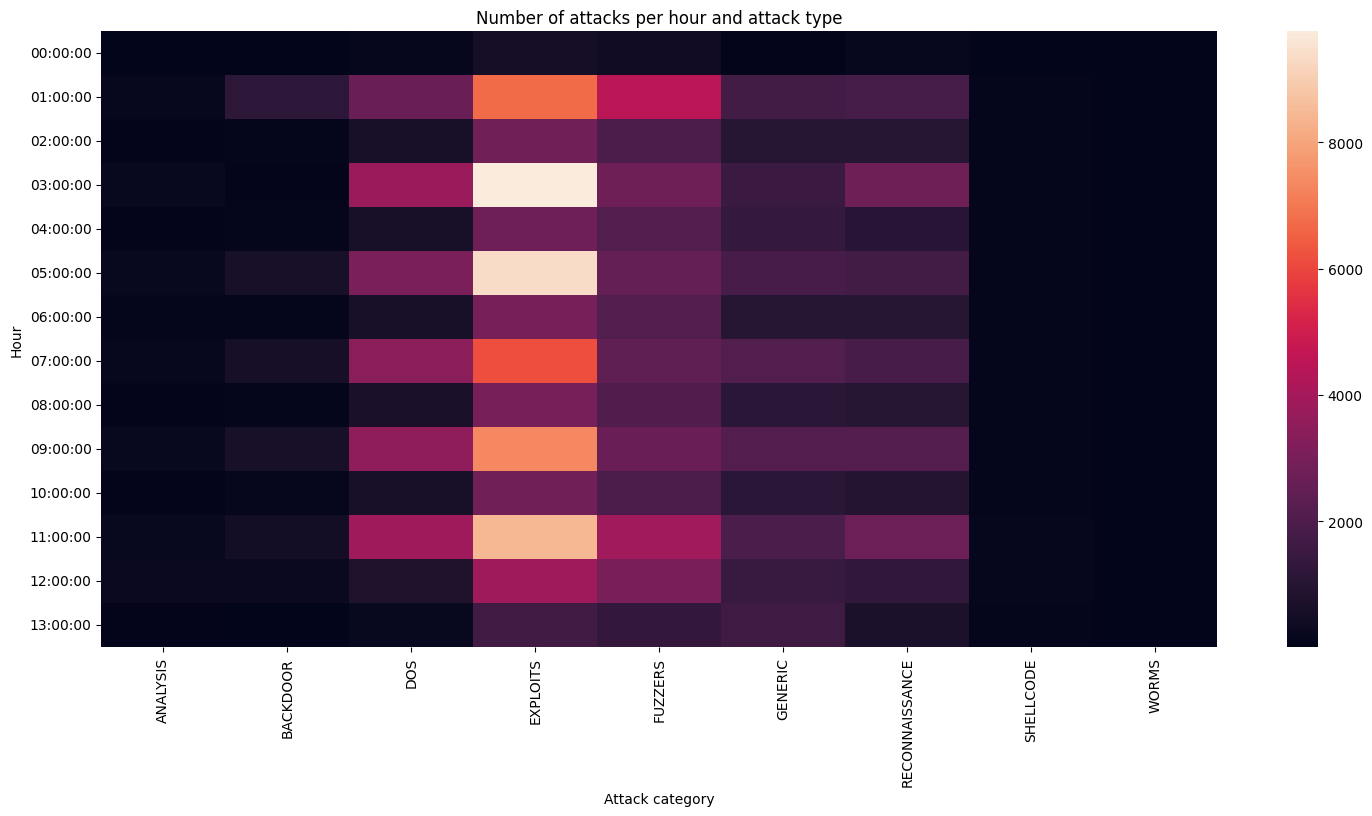

In [ ]:
heatmap_graph(df = df_p1, xlabel = 'Attack category', ylabel = 'Hour', title = 'Number of attacks per hour and attack type')

From the above plot, we can observe that:

> The attacks like Analysis, Shellcode and Worms, are same throughout the day.

> The attacks like DOS, Exploits, Fuzzers show some pattern - the attacks are more the odd hours than even hours. This show that attackers know something about this company like maybe at the odd hours some security backups are happeing and that time penetrating to the IP is easy. There might be other options as well.

Let's now analyse Destination IP vs hours plot and check the attack pattern.

We will do this by creating another pivot table and then plot the heatmap.

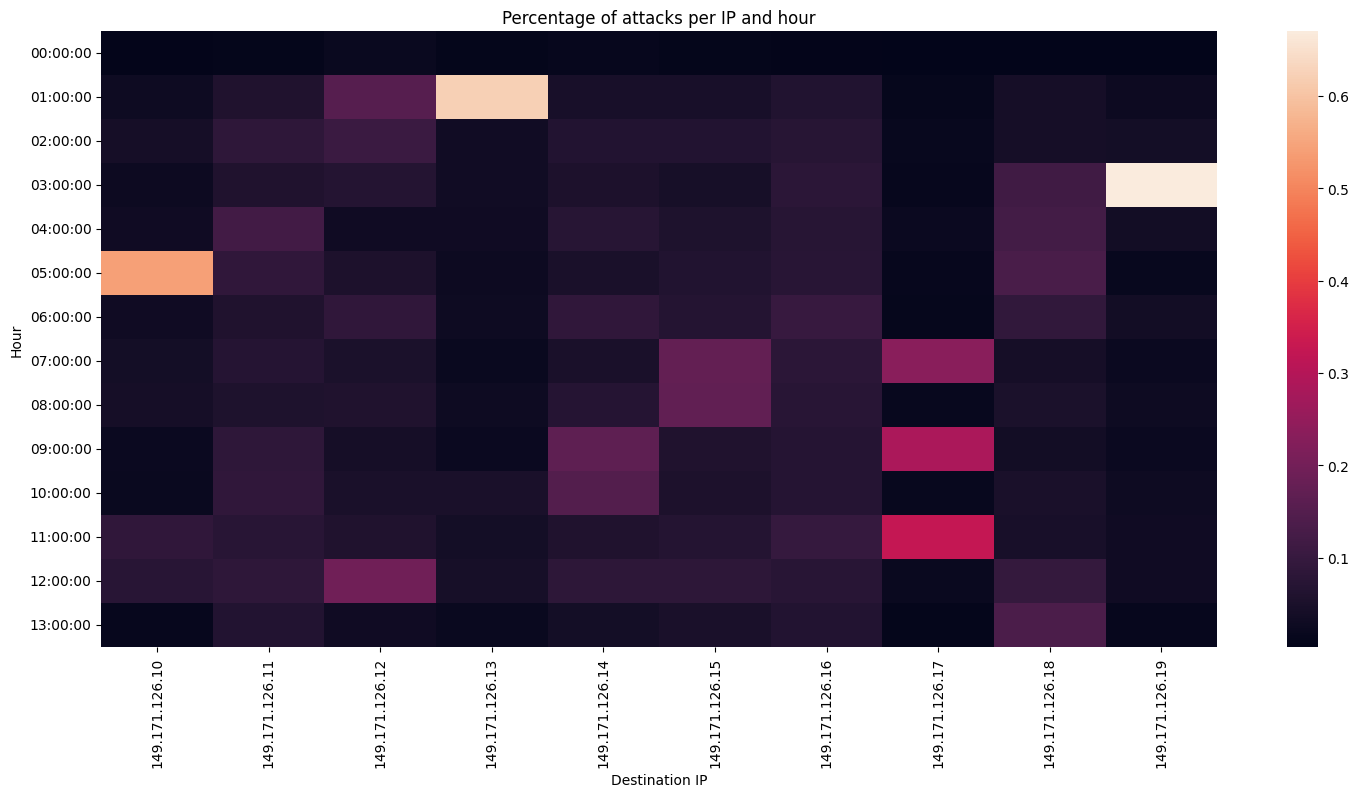

In [ ]:
df_p2 = pd.pivot_table(df_pivot, values='Attack Name', index=['Hour'], columns=['Destination IP'], aggfunc='count')
heatmap_graph(df = df_p2/df_p2.sum(), xlabel = 'Destination IP', ylabel = 'Hour', title = 'Percentage of attacks per IP and hour')

Now here is some catch. As we can see, IP 149.171.126.10 is attacked most at 5:00 AM. Likewise IP 149.171.126.13 is attacked most at 1:00 AM. This shows that the attackers know some activity patterns about particular IPs. This will help us provide more security during those hours to these IPs.

Although there are more than 170,000 records related to cybersecurity attacks, these attacks target 10 servers with IPv4 addresses in the interval  [149.171.126.10, 149.171.126.19] . This means that the company was attacked on multiple occasions during the observed timeframe, on a specific subnet, which denotes a non-accidental and directed succession of events.

Let's now observe which IP gets attacked the most by attack type.

For this, we will create another pivot table for Attack category vs IP

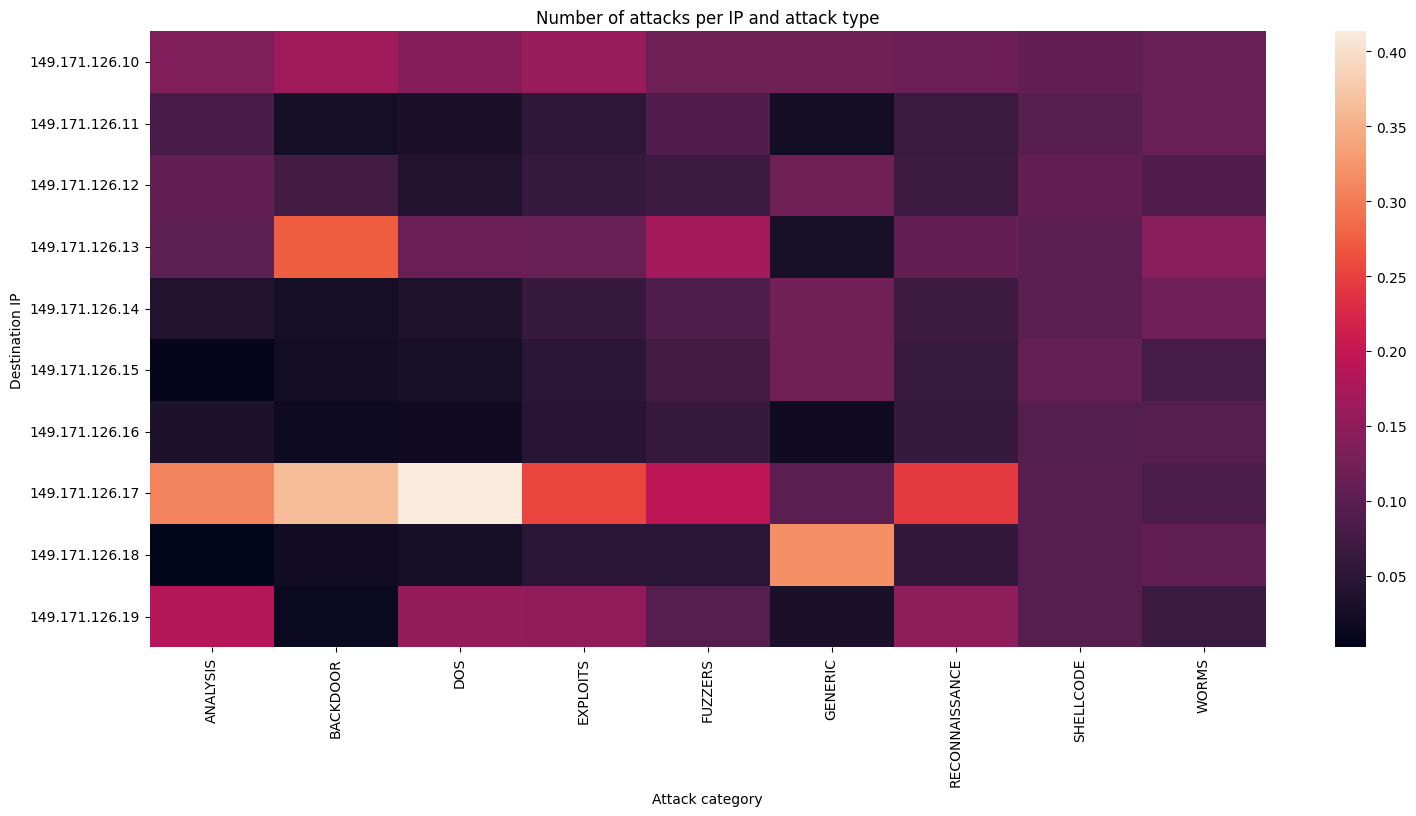

In [ ]:
df_p3 = pd.pivot_table(df_pivot, values='Attack Name', index=['Destination IP'], columns=['Attack category'], aggfunc='count')
heatmap_graph(df = df_p3/df_p3.sum(), xlabel = 'Attack category', ylabel = 'Destination IP', title = 'Number of attacks per IP and attack type')

Here, we can observe that Ip 149.171.126.17 is most prone to all types of attack. Out of these, DOS attack is the most and the cybersecurity experts need to provide this IP extra protection. Conversely, while worms, shellcode and generic attacks are not directed at particular machines, Denial of Services, Exploits and Backdoor attacks are clearly targeted towards specific servers.

Let's now look at this same relationship per attack category performing a pair-wise T-test:

Here, our H0 is that there is no relation between source and destination ports, i.e., the attacks based on their attack any port randomly.

In [ ]:
for attack in list(newdf['Attack category'].unique()):
    df_attack = newdf[newdf['Attack category'] == attack].copy()
    statistic, pvalue = stats.ttest_ind(df_attack['Source Port'], df_attack['Destination Port'], equal_var=False)
    print('p-value in T-test for ' + attack + ' attack: ' + str(pvalue))

p-value in T-test for RECONNAISSANCE attack: 0.0
p-value in T-test for EXPLOITS attack: 0.0
p-value in T-test for DOS attack: 0.0
p-value in T-test for GENERIC attack: 0.0
p-value in T-test for SHELLCODE attack: 0.3205085348227197
p-value in T-test for FUZZERS attack: 0.0
p-value in T-test for WORMS attack: 4.246722648635902e-46
p-value in T-test for BACKDOOR attack: 4.8983630604388355e-17
p-value in T-test for ANALYSIS attack: 9.319524862935002e-87


As can be seen, the p-values of all but one attack category are very close to 0.0. This means that the attacks have been directed to the specific ports, except for the Shellcode attacks, whose null hypothesis cannot be rejected. For this type of attack there is a defined randomness, which means that the source and destination ports have similar averages.

To verify this statement, we will make use of a contingency table which allows to relate the count of a certain pair of variables, similar to how we saw the .pivot_table()

In [ ]:
df_crosstab = pd.crosstab(newdf['Attack category'], newdf['Destination Port'])
df_crosstab

Destination Port,0,10,21,22,23,25,31,42,53,67,...,65455,65460,65470,65479,65486,65497,65502,65511,65517,65535
Attack category,,,,,,,,,,,,,,,,,,,,,
ANALYSIS,1442,0,0,0,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BACKDOOR,4000,0,7,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DOS,20825,4,75,0,13,425,0,0,154,33,...,0,0,0,0,0,0,0,0,0,0
EXPLOITS,40143,0,2198,14,135,4412,0,21,209,98,...,2,2,2,2,2,4,2,2,2,0
FUZZERS,13355,0,758,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GENERIC,2612,0,26,6,0,427,0,0,13438,54,...,0,0,0,0,0,0,0,0,0,6
RECONNAISSANCE,8324,0,0,0,7,7,0,0,41,0,...,0,0,0,0,0,0,0,0,0,0
SHELLCODE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WORMS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Contingency table of `Attack type` versus `Target port` and the individual counts are not uniform. This allows to affirm our inference that there might be an interaction between these two variables. We can formally test whether the variations we observe reflect real differences or are just a by-product of randomness. There are many different ways to test, but we will focus on the most widely used test: the **Chi-square test**. The null hypothesis for the Chi-square test is as follows:

H0: The attack category is independent of the destination port

Intuitively, independence between two variables means that the distribution of values of one variable remains the same even when the value of the second variable changes (and vice versa). In our case, this means that the proportions of the different attack categories remain the same, even when we look at different destination ports. The data seems to indicate otherwise, so let's discuss how to numerically summarize the data to formally examine the null hypothesis:

In [ ]:
from scipy.stats import chi2_contingency
chi2, p_value, dof, expected = chi2_contingency(df_crosstab)
print("p-value of Chi-square test for Attack category vs. Destination Port =", p_value)

p-value of Chi-square test for Attack category vs. Destination Port = 0.0


The  pvalue is extremely small and therefore we reject the null hypothesis and conclude that the attack category and destination port are not independent. In other words, the destination port do not remain the same for different attack categories, what agrees with what we observe previously.

To visualize this relationship between these variables (source port, destination port, and attack category), we can initially make a scatterplot using the .scatterplot() function between the source and destination ports in terms of the attack category:

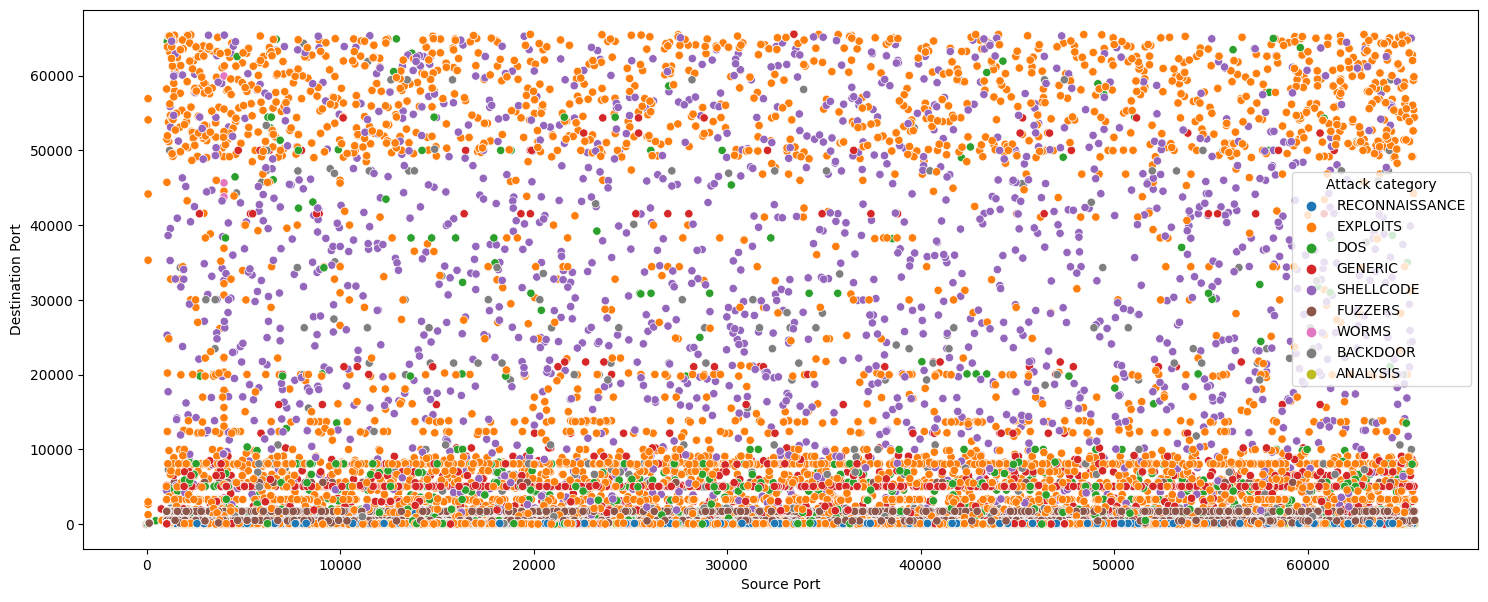

In [ ]:
plt.figure(figsize=(18,7))
sns.scatterplot(x='Source Port',y='Destination Port', hue='Attack category',data=newdf)
plt.show()

A certain pattern can be seen in the graph, in which attacks usually occur on ports less than 10,000 or greater than 50,000, except for shellcode-type attacks, as we had anticipated in the hypothesis test.

To see this relationship more in depth, we can visualize the the distribution of the logical origin and destination ports with a strip diagram using the .stripplot() function:

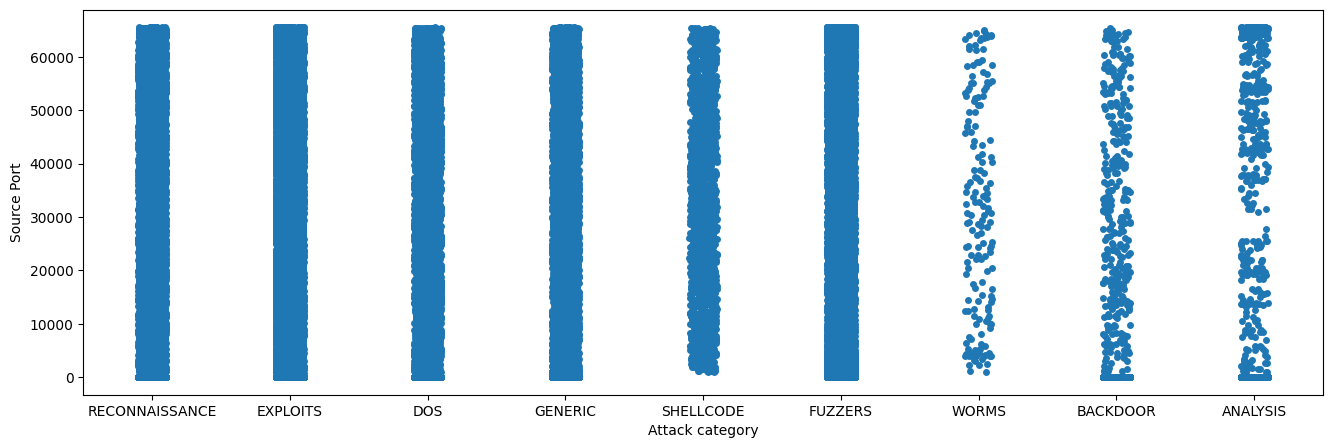

In [ ]:
# Source ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Source Port',data=newdf)
plt.show()

The above plot shows the which ports attackers use the most and and for what attack category.

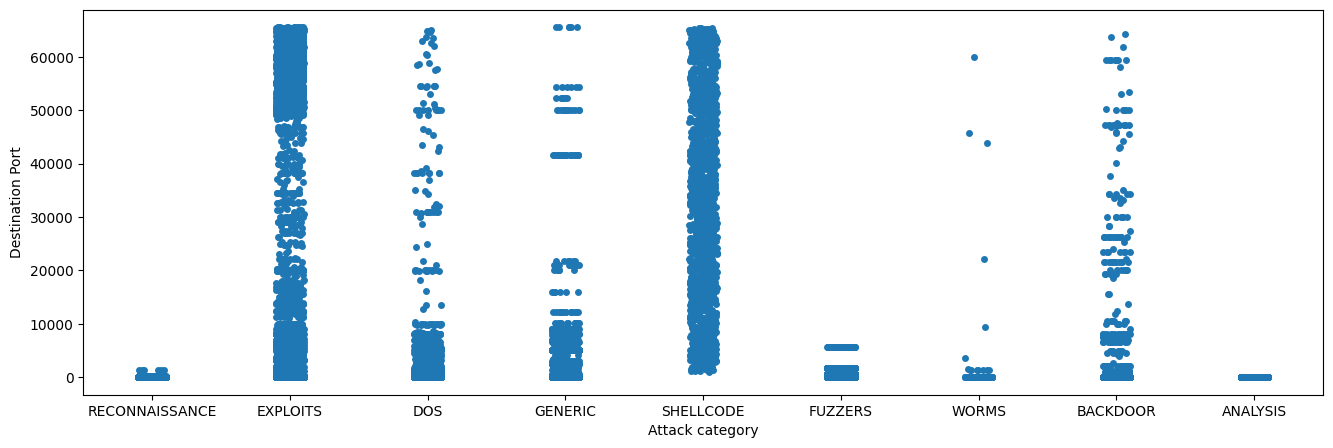

In [ ]:
# Destination ports
plt.figure(figsize=(16,5))
sns.stripplot(x='Attack category',y='Destination Port',data=newdf)
plt.show()

Although there is randomness in source ports, but it is clear that for different attack types, attackers are targeting specific ports.

Let's finally plot this plot for top most attacked IPs

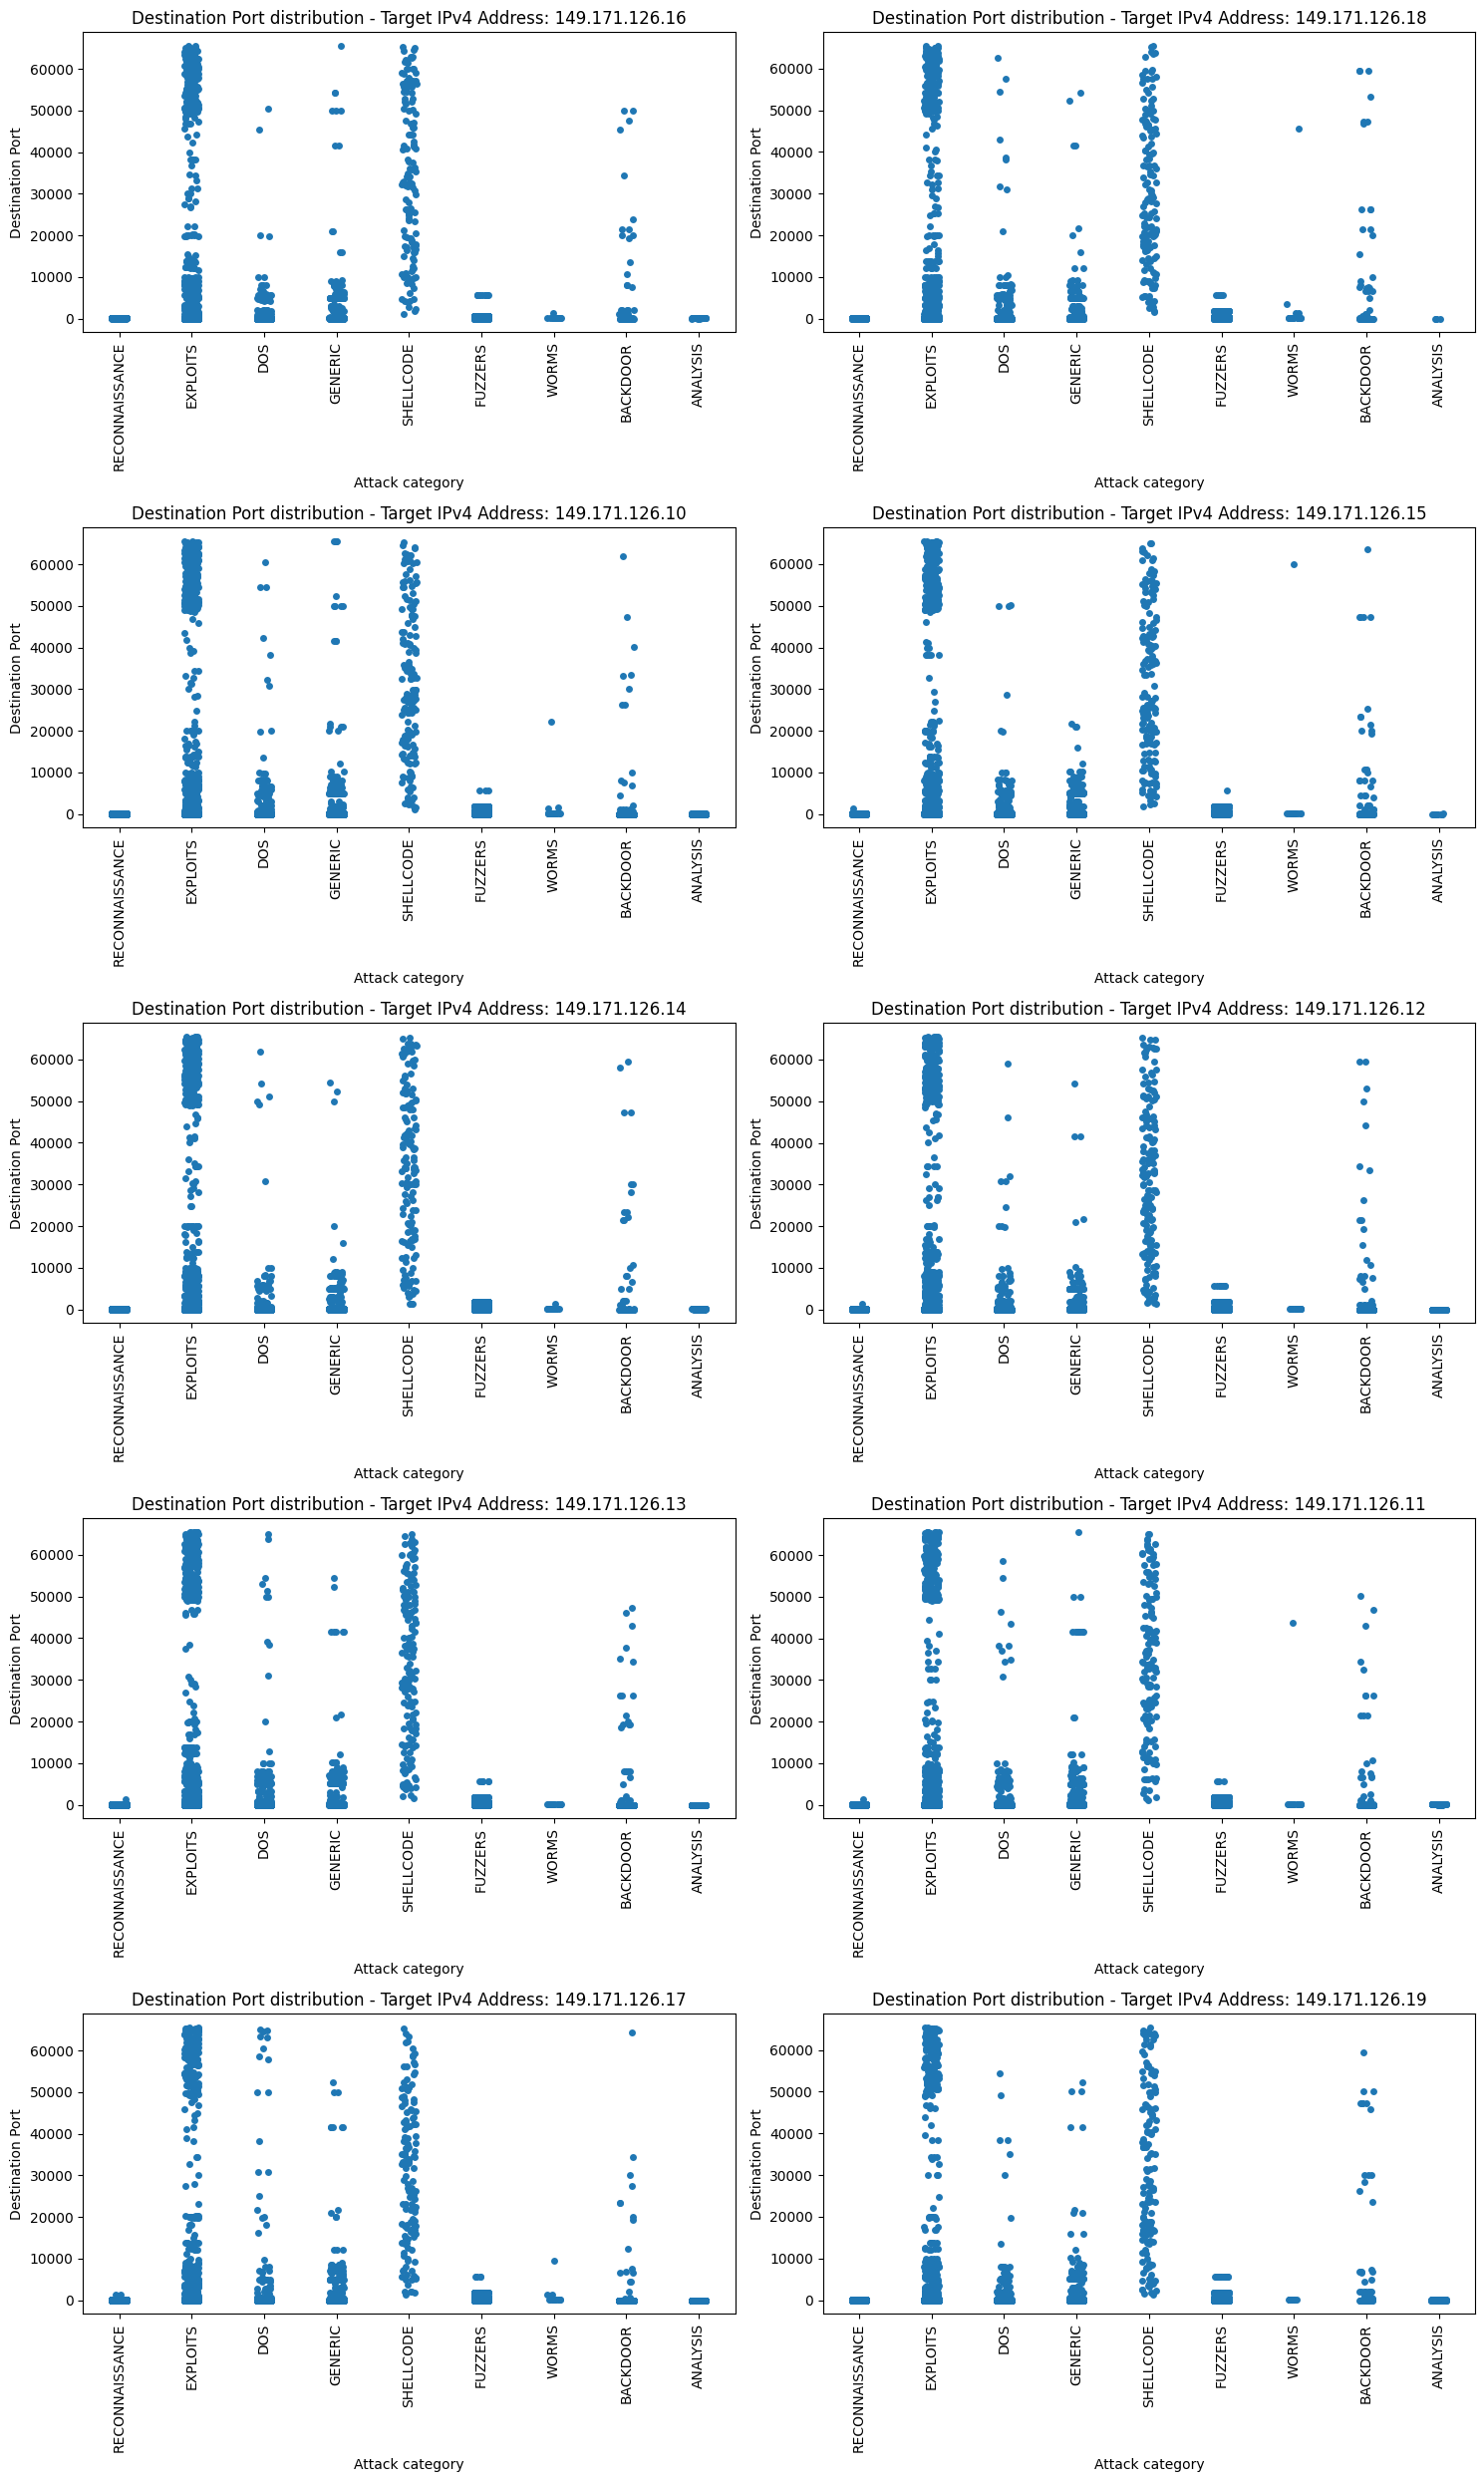

In [ ]:
ips = list(newdf['Destination IP'].unique())
f, axes = plt.subplots(5, 2)
f.set_figheight(25)
f.set_figwidth(15)

labels = list(newdf['Attack category'].unique())

for i, ip in enumerate(ips):
    sns.stripplot(x='Attack category',y='Destination Port',data=newdf[newdf['Destination IP'] == ip], order=labels, ax=axes[int(i/2)][i%2])
    axes[int(i/2)][i%2].set_xlabel('Attack category')
    axes[int(i/2)][i%2].set_ylabel('Destination Port')
    axes[int(i/2)][i%2].set_title('Destination Port distribution - Target IPv4 Address: ' + ip)
    axes[int(i/2)][i%2].set_xticklabels(labels,rotation=90)
plt.tight_layout()
plt.show()

These graphs show us that there is a differentiation in the way in which the attacks are performing their tasks. There is a particularization by the targets, something that does not happen with the source devices.